In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # Import the files module for uploading files


In [2]:
# Upload the dataset
uploaded = files.upload()

# Read the data into a Pandas DataFrame (assuming the uploaded file is 'orbits.csv')
df = pd.read_csv('orbits.csv')


Saving orbits.csv to orbits.csv


In [3]:
# 1. View Dataset Structure
print("Dataset Structure:")
print(df.head())

Dataset Structure:
    Object Name Object Classification  Epoch (TDB)  Orbit Axis (AU)  \
0      433 Eros         Amor Asteroid        57800           1.4579   
1    719 Albert         Amor Asteroid        57800           2.6385   
2    887 Alinda         Amor Asteroid        57800           2.4787   
3  1036 Ganymed         Amor Asteroid        57800           2.6628   
4     1221 Amor         Amor Asteroid        57800           1.9191   

   Orbit Eccentricity  Orbit Inclination (deg)  Perihelion Argument (deg)  \
0              0.2226                  10.8277                   178.8050   
1              0.5479                  11.5822                   156.1409   
2              0.5671                   9.3561                   350.3482   
3              0.5338                  26.6929                   132.4690   
4              0.4356                  11.8795                    26.6572   

   Node Longitude (deg)  Mean Anomoly (deg)  Perihelion Distance (AU)  \
0              304

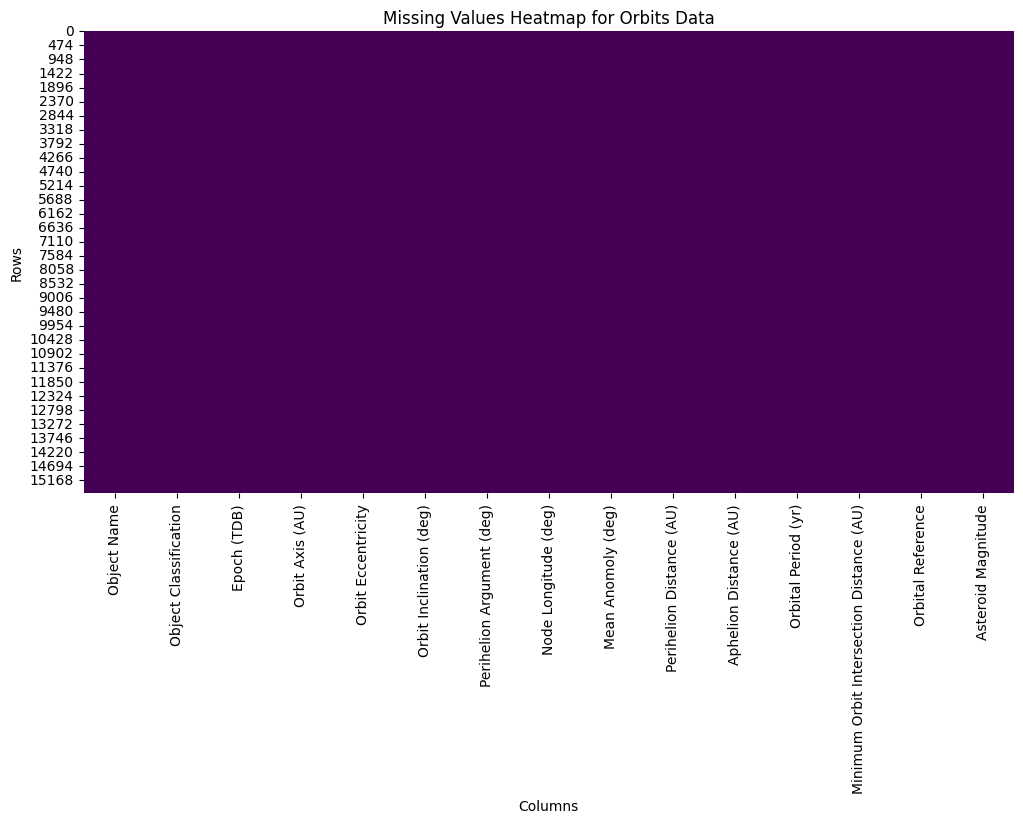

In [4]:
# Create a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for Orbits Data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [7]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Specify the fraction of data to be set to NaN
missing_fraction = 0.1  # 10%

# Randomly select rows in specific columns to replace with NaN
for column in ['Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)']:
    # Select random indices
    random_indices = np.random.choice(df.index,
                                       size=int(len(df) * missing_fraction),
                                       replace=False)
    df.loc[random_indices, column] = np.nan

# Check the DataFrame to see missing values
print(df.isnull().sum())


Object Name                                    0
Object Classification                          0
Epoch (TDB)                                    0
Orbit Axis (AU)                             1563
Orbit Eccentricity                          1563
Orbit Inclination (deg)                     1563
Perihelion Argument (deg)                      0
Node Longitude (deg)                           0
Mean Anomoly (deg)                             0
Perihelion Distance (AU)                       0
Aphelion Distance (AU)                         0
Orbital Period (yr)                            0
Minimum Orbit Intersection Distance (AU)       0
Orbital Reference                              0
Asteroid Magnitude                             1
dtype: int64


In [8]:
# Manually set specific rows to NaN
df.loc[0, 'Orbit Axis (AU)'] = np.nan
df.loc[1, 'Orbit Inclination (deg)'] = np.nan
df.loc[2, 'Orbit Eccentricity'] = np.nan

# Check the DataFrame to see missing values
print(df.isnull().sum())

Object Name                                    0
Object Classification                          0
Epoch (TDB)                                    0
Orbit Axis (AU)                             1563
Orbit Eccentricity                          1563
Orbit Inclination (deg)                     1564
Perihelion Argument (deg)                      0
Node Longitude (deg)                           0
Mean Anomoly (deg)                             0
Perihelion Distance (AU)                       0
Aphelion Distance (AU)                         0
Orbital Period (yr)                            0
Minimum Orbit Intersection Distance (AU)       0
Orbital Reference                              0
Asteroid Magnitude                             1
dtype: int64


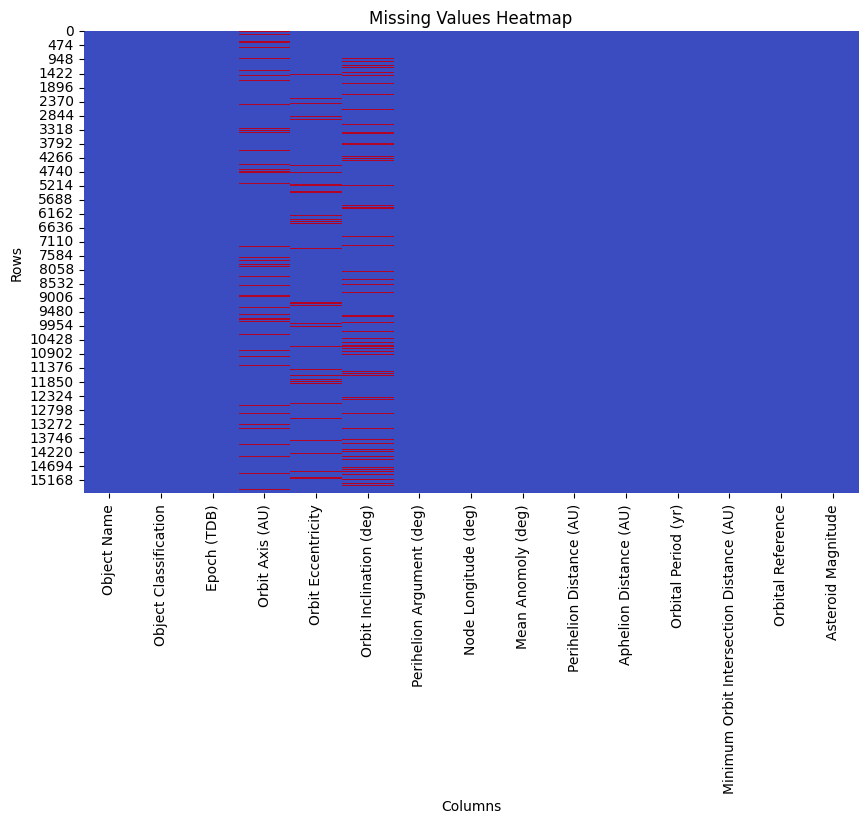

In [9]:
# Visualize the missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [10]:
# Create a summary DataFrame for missing values
missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})

# Display the summary
print(missing_summary)


                                          Missing Count  Missing Percentage
Object Name                                           0            0.000000
Object Classification                                 0            0.000000
Epoch (TDB)                                           0            0.000000
Orbit Axis (AU)                                    1563            9.996802
Orbit Eccentricity                                 1563            9.996802
Orbit Inclination (deg)                            1564           10.003198
Perihelion Argument (deg)                             0            0.000000
Node Longitude (deg)                                  0            0.000000
Mean Anomoly (deg)                                    0            0.000000
Perihelion Distance (AU)                              0            0.000000
Aphelion Distance (AU)                                0            0.000000
Orbital Period (yr)                                   0            0.000000
Minimum Orbi

In [11]:
# Interpolate to fill missing values
df.interpolate(method='linear', inplace=True)

# Check if there are still missing values
print("Missing values after interpolation:\n", df.isnull().sum())


Missing values after interpolation:
 Object Name                                 0
Object Classification                       0
Epoch (TDB)                                 0
Orbit Axis (AU)                             1
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
dtype: int64


<ipython-input-11-bb9ce80d733a>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [13]:
# Fill missing values with the median of the respective column
for column in ['Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)']:
    df[column].fillna(df[column].median(), inplace=True)

# Check if there are still missing values
print("Missing values after filling with median:\n", df.isnull().sum())


Missing values after filling with median:
 Object Name                                 0
Object Classification                       0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
dtype: int64


<ipython-input-13-63bec8d1d5b7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


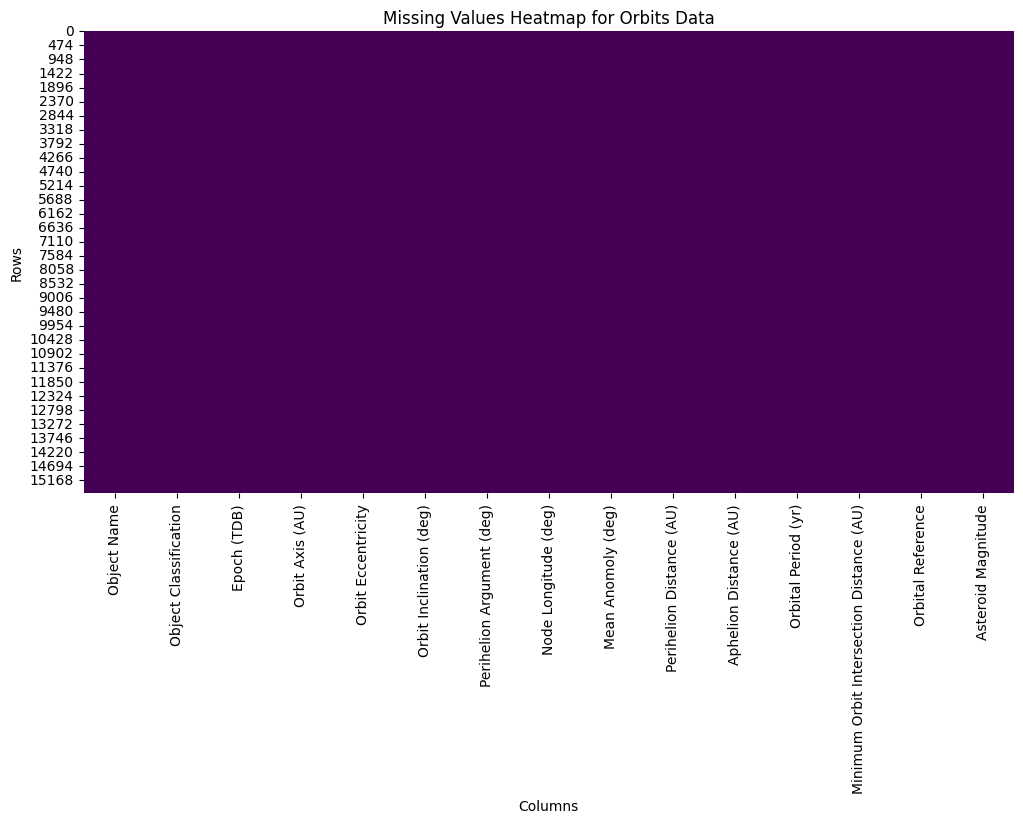

In [14]:
# Create a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for Orbits Data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

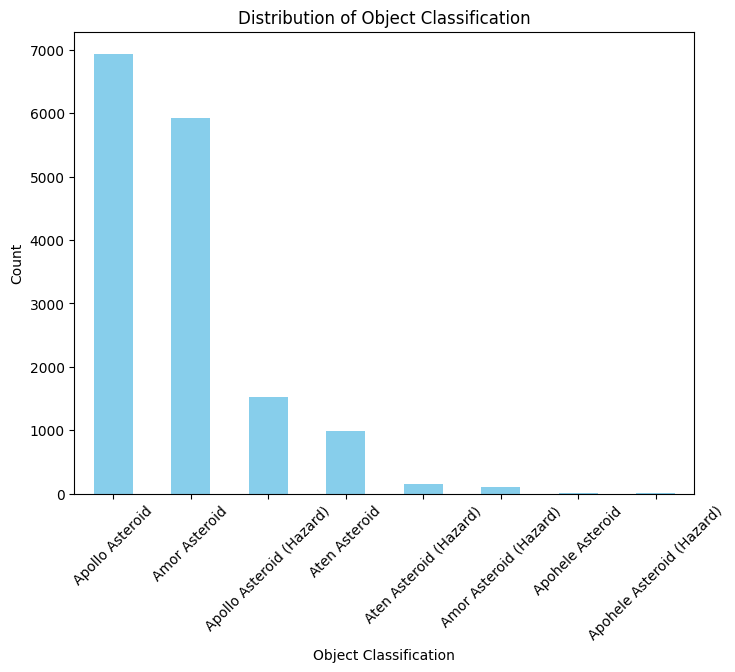

In [15]:
# Distribution of Object Classification
plt.figure(figsize=(8, 6))
df['Object Classification'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Object Classification')
plt.xlabel('Object Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

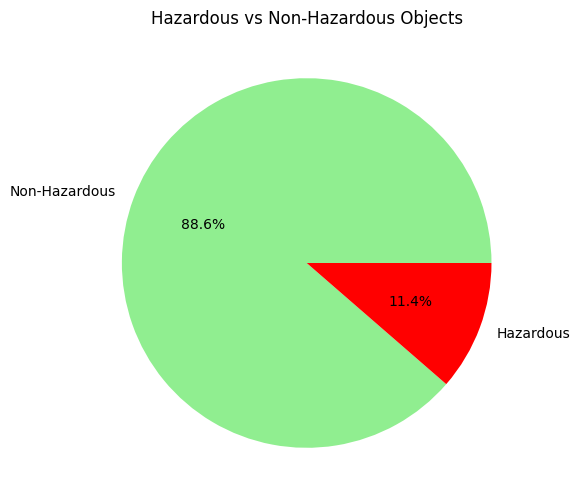

In [16]:
# Hazardous vs Non-Hazardous Objects
hazard_data = df['Object Classification'].str.contains('Hazard').fillna(False)
hazard_counts = hazard_data.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(hazard_counts, labels=['Non-Hazardous', 'Hazardous'], autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title('Hazardous vs Non-Hazardous Objects')
plt.show()

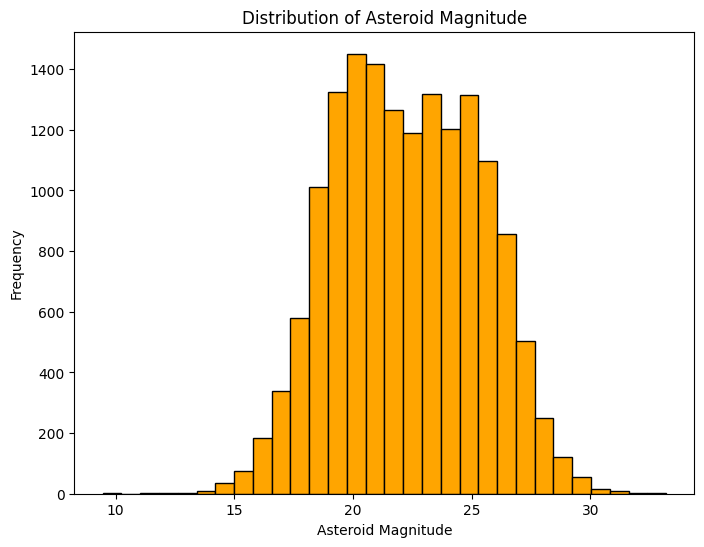

In [17]:
# Distribution of Asteroid Magnitude
plt.figure(figsize=(8, 6))
plt.hist(df['Asteroid Magnitude'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Asteroid Magnitude')
plt.xlabel('Asteroid Magnitude')
plt.ylabel('Frequency')
plt.show()

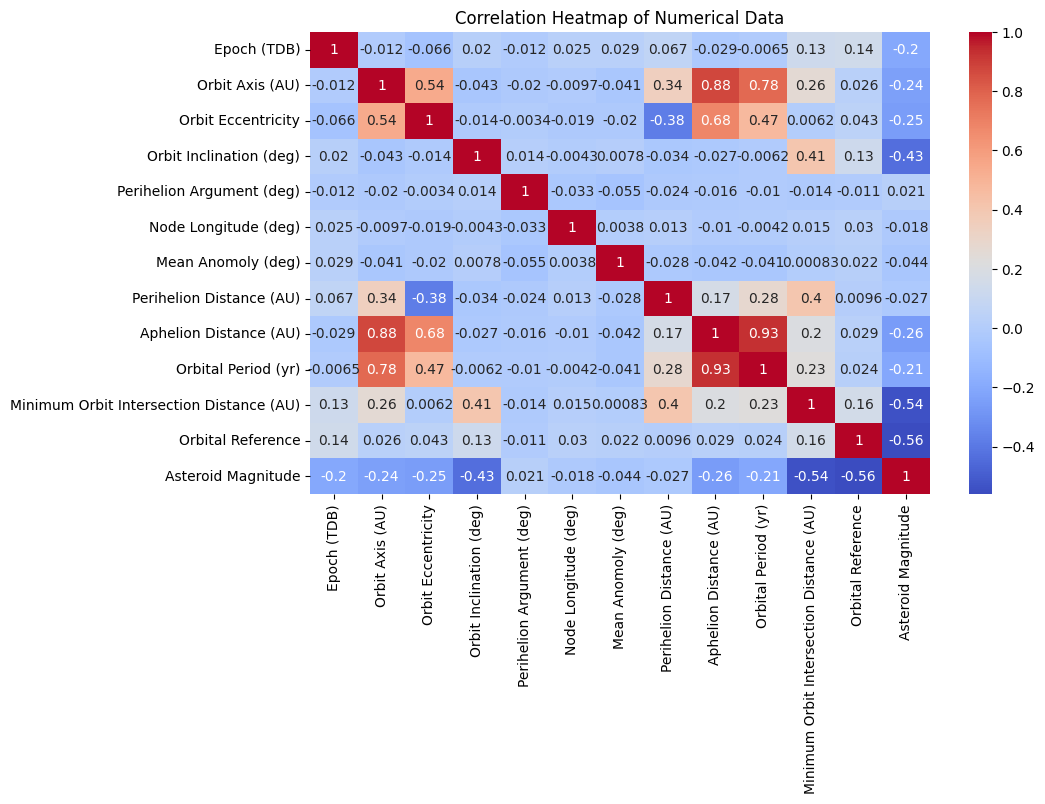

In [18]:
# Correlation Heatmap (Numerical Data)
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Data')
plt.show()

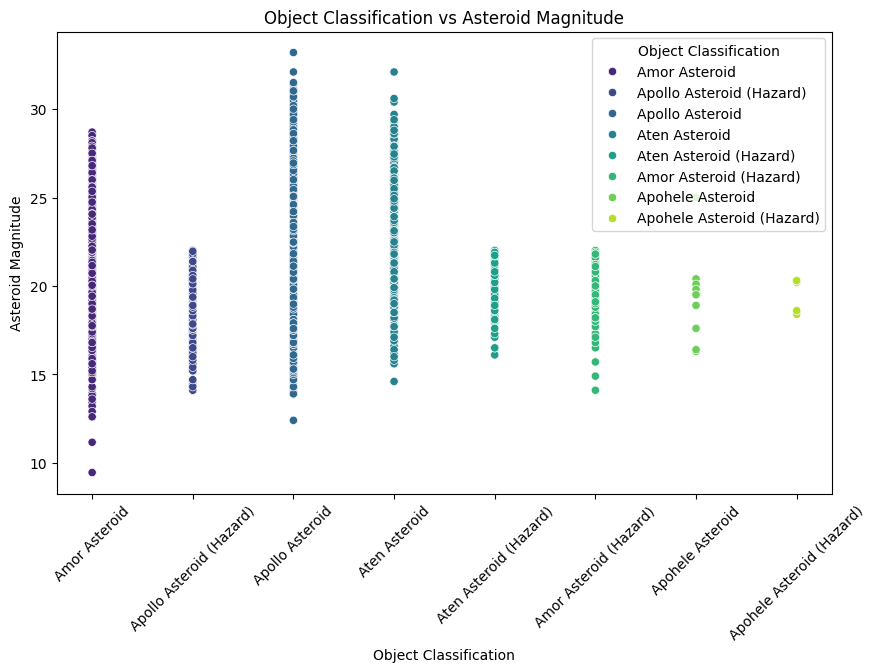

In [19]:
# Scatter Plot: Object Classification vs Asteroid Magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Object Classification', y='Asteroid Magnitude', data=df, hue='Object Classification', palette='viridis')
plt.title('Object Classification vs Asteroid Magnitude')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Make a copy of the original DataFrame so if we need to run this again from scratch, all of the formatting runs smoothly
orbit_df = df.copy()
# Show the copy
orbit_df.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
0,433 Eros,Amor Asteroid,57800,1.74235,0.22260,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16
1,719 Albert,Amor Asteroid,57800,2.63850,0.54790,10.0919,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50
2,887 Alinda,Amor Asteroid,57800,2.47870,0.54085,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40
3,1036 Ganymed,Amor Asteroid,57800,2.19890,0.53380,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45
4,1221 Amor,Amor Asteroid,57800,1.91910,0.43560,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70


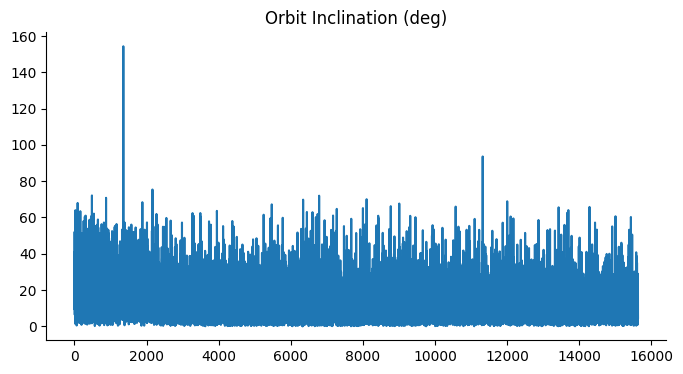

In [22]:
# Orbit Inclination (deg)

from matplotlib import pyplot as plt
orbit_df['Orbit Inclination (deg)'].plot(kind='line', figsize=(8, 4), title='Orbit Inclination (deg)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
# Checking for Unique values in Column 'Object Name' Orbit dataframe
unique_values_Obname_orbit = orbit_df['Object Name'].unique()
print(unique_values_Obname_orbit)

['433\xa0Eros' '719\xa0Albert' '887\xa0Alinda' ... '(2017\xa0CP5)'
 '(2017\xa0CR5)' '(6344\xa0P-L)']


In [24]:
# Get the total unique value length for the Object Name column
total_uniquevalues_Obname_orbit = len(unique_values_Obname_orbit)
# Show the number of unique values
print(total_uniquevalues_Obname_orbit)

15635


In [25]:
# Checking for Unique values in Column 'Object Classification' Orbit dataframe
unique_values_Ob_Class = orbit_df['Object Classification'].unique()
print(unique_values_Ob_Class)

['Amor Asteroid' 'Apollo Asteroid (Hazard)' 'Apollo Asteroid'
 'Aten Asteroid' 'Aten Asteroid (Hazard)' 'Amor Asteroid (Hazard)'
 'Apohele Asteroid' 'Apohele Asteroid (Hazard)']


In [26]:
# Split the Object Classification column to extract the "Hazard" value and create a new column for these values
orbit_df[["Object Classification", "Hazardous"]] = orbit_df['Object Classification'].str.split('(', n=1, expand=True)

# Show the new DataFrame
orbit_df

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.74235,0.22260,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None
1,719 Albert,Amor Asteroid,57800,2.63850,0.54790,10.0919,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None
2,887 Alinda,Amor Asteroid,57800,2.47870,0.54085,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None
3,1036 Ganymed,Amor Asteroid,57800,2.19890,0.53380,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None
4,1221 Amor,Amor Asteroid,57800,1.91910,0.43560,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,(2017 CX1),Apollo Asteroid,57800,1.40960,0.29460,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21,None
15631,(2017 CO5),Amor Asteroid,57789,2.26120,0.44290,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04,None
15632,(2017 CP5),Amor Asteroid,57800,1.51310,0.32750,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74,None
15633,(2017 CR5),Apollo Asteroid,57793,2.15870,0.46460,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95,None


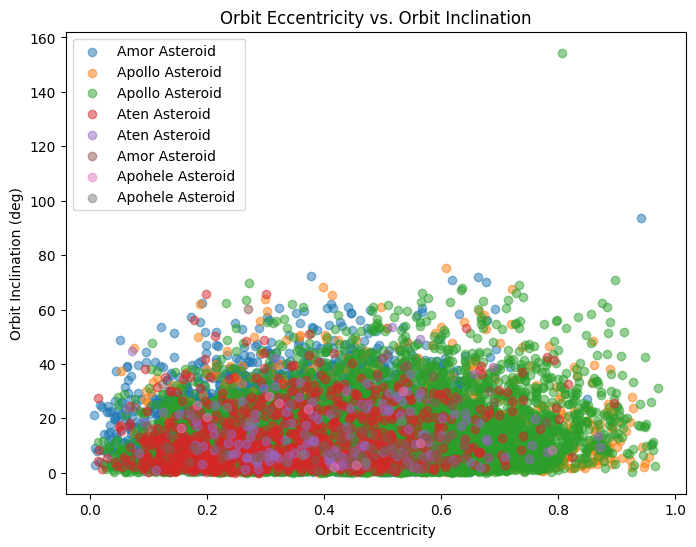

In [28]:
# Orbit Eccentricity vs. Orbit Inclination

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'orbit_df'

plt.figure(figsize=(8, 6))
for classification in orbit_df['Object Classification'].unique():
    subset = orbit_df[orbit_df['Object Classification'] == classification]
    plt.scatter(subset['Orbit Eccentricity'], subset['Orbit Inclination (deg)'], label=classification, alpha=0.5)
plt.xlabel('Orbit Eccentricity')
plt.ylabel('Orbit Inclination (deg)')
plt.title('Orbit Eccentricity vs. Orbit Inclination')
_ = plt.legend()

In [29]:
# Remove any leading and trailing whitespace characters from the strings in the "Object Classification" column of the orbit_df DataFrame.
orbit_df["Object Classification"] = orbit_df["Object Classification"].str.strip()

# Show the changed DataFrame
orbit_df.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.74235,0.22260,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,None
1,719 Albert,Amor Asteroid,57800,2.63850,0.54790,10.0919,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,None
2,887 Alinda,Amor Asteroid,57800,2.47870,0.54085,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,None
3,1036 Ganymed,Amor Asteroid,57800,2.19890,0.53380,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,None
4,1221 Amor,Amor Asteroid,57800,1.91910,0.43560,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,None


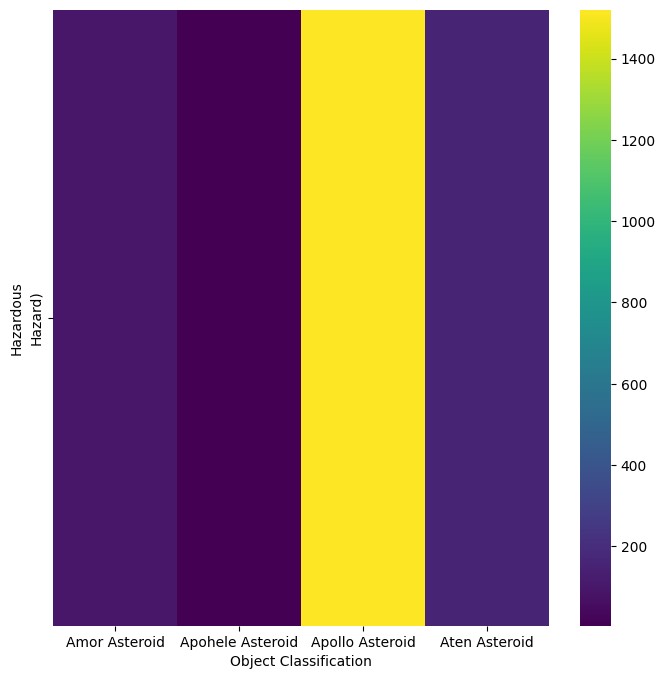

In [32]:
# Object Classification vs Hazardous

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Hazardous'].value_counts()
    for x_label, grp in orbit_df.groupby('Object Classification')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Object Classification')
_ = plt.ylabel('Hazardous')

In [33]:
# Print unique values before replacing the word 'Hazard)'
print("Unique values before replacement:", orbit_df['Hazardous'].unique())

Unique values before replacement: [None 'Hazard)']


In [34]:
# Replace 'Hazard)' with 'Hazard'
orbit_df['Hazardous'] = orbit_df['Hazardous'].replace('Hazard)', 'Hazard')
# Print unique values after name edit to confirm changes took place
print("Unique values after replacement:", orbit_df['Hazardous'].unique())

Unique values after replacement: [None 'Hazard']


In [35]:
# Find out if there are null values in the dataframe
null_values = orbit_df.isnull().sum()
print(null_values)

Object Name                                     0
Object Classification                           0
Epoch (TDB)                                     0
Orbit Axis (AU)                                 0
Orbit Eccentricity                              0
Orbit Inclination (deg)                         0
Perihelion Argument (deg)                       0
Node Longitude (deg)                            0
Mean Anomoly (deg)                              0
Perihelion Distance (AU)                        0
Aphelion Distance (AU)                          0
Orbital Period (yr)                             0
Minimum Orbit Intersection Distance (AU)        0
Orbital Reference                               0
Asteroid Magnitude                              0
Hazardous                                   13856
dtype: int64


In [36]:
# Fill missing categorical values with the mode (most frequent value)
for column in orbit_df.select_dtypes(include=[object]).columns:
    orbit_df[column].fillna(orbit_df[column].mode()[0], inplace=True)


<ipython-input-36-768768b78f7e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orbit_df[column].fillna(orbit_df[column].mode()[0], inplace=True)


In [37]:
# Check again if there are any missing values left
null_values_after_imputation = orbit_df.isnull().sum()
print("Null values after imputation:\n", null_values_after_imputation)


Null values after imputation:
 Object Name                                 0
Object Classification                       0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
Hazardous                                   0
dtype: int64


In [40]:
# Display dataframe with changes
orbit_df

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.74235,0.22260,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Hazard
1,719 Albert,Amor Asteroid,57800,2.63850,0.54790,10.0919,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Hazard
2,887 Alinda,Amor Asteroid,57800,2.47870,0.54085,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Hazard
3,1036 Ganymed,Amor Asteroid,57800,2.19890,0.53380,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Hazard
4,1221 Amor,Amor Asteroid,57800,1.91910,0.43560,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Hazard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,(2017 CX1),Apollo Asteroid,57800,1.40960,0.29460,3.4011,353.7433,138.1226,8.7456,0.9943,1.82,1.67,0.0092,2,28.21,Hazard
15631,(2017 CO5),Amor Asteroid,57789,2.26120,0.44290,28.9728,147.6444,348.1501,5.7171,1.2598,3.26,3.40,0.3136,2,20.04,Hazard
15632,(2017 CP5),Amor Asteroid,57800,1.51310,0.32750,14.2656,46.6749,130.7234,344.8663,1.0175,2.01,1.86,0.0934,1,24.74,Hazard
15633,(2017 CR5),Apollo Asteroid,57793,2.15870,0.46460,7.1647,0.2261,136.7746,1.1654,1.0073,2.76,2.58,0.0213,1,26.95,Hazard


In [39]:
# Make a copy of the DataFrame before dropping columns
orbit_df2 = orbit_df.copy()
# Show the copy
orbit_df2.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.74235,0.22260,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Hazard
1,719 Albert,Amor Asteroid,57800,2.63850,0.54790,10.0919,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Hazard
2,887 Alinda,Amor Asteroid,57800,2.47870,0.54085,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Hazard
3,1036 Ganymed,Amor Asteroid,57800,2.19890,0.53380,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Hazard
4,1221 Amor,Amor Asteroid,57800,1.91910,0.43560,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Hazard


In [41]:
# Check columns after dropping
print("Columns after dropping 'Object Name':", orbit_df2.columns)

Columns after dropping 'Object Name': Index(['Object Name', 'Object Classification', 'Epoch (TDB)',
       'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Aphelion Distance (AU)', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude', 'Hazardous'],
      dtype='object')


In [42]:
# If above we were dropping more than one column, this code would be used:
# orbit_df2 = orbit_df2.drop(columns=['Object Name', 'Object Classification'])

In [43]:
# Once the changes have been verified, store the dataframe copy to the original variable for continuation
orbit_df = orbit_df2

In [44]:
# Save cleaned DataFrame into a new CSV file
orbit_df.to_csv('cleaned_Asteroid_orbit.csv', index=False)

In [45]:
# Show a sample of the DataFrame that we are saving
orbit_df.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Hazardous
0,433 Eros,Amor Asteroid,57800,1.74235,0.22260,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Hazard
1,719 Albert,Amor Asteroid,57800,2.63850,0.54790,10.0919,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Hazard
2,887 Alinda,Amor Asteroid,57800,2.47870,0.54085,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Hazard
3,1036 Ganymed,Amor Asteroid,57800,2.19890,0.53380,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Hazard
4,1221 Amor,Amor Asteroid,57800,1.91910,0.43560,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Hazard
